In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter


                ts_now         ts_simulator                           node  \
0  2021-12-17 13:54:04  2020-12-25 12:00:00  ip-172-20-45-201.ec2.internal   
1  2021-12-17 13:54:04  2020-12-25 12:00:00   ip-172-20-49-41.ec2.internal   
2  2021-12-17 13:54:04  2020-12-25 12:00:00  ip-172-20-58-134.ec2.internal   
3  2021-12-17 13:54:04  2020-12-25 12:00:00  ip-172-20-61-178.ec2.internal   
4  2021-12-17 13:54:09  2020-12-25 12:00:00  ip-172-20-45-201.ec2.internal   

   consumption  production  
0          157         0.0  
1          137       436.8  
2          154       467.0  
3          178       261.0  
4          157         0.0  
9.075381553560531 8.68177364824894 10.717001252063742 0.0


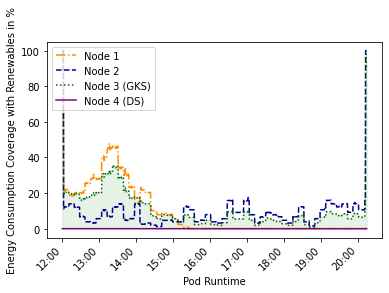

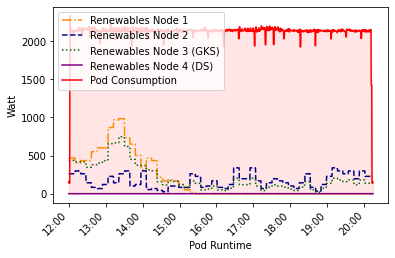

In [11]:
# 5.2.1

# configure simulator / nodemonitor interval as tests were not done in realtime
interval_simulator = 120
interval_monitor = 5
ts_resample = 600 / (interval_simulator / interval_monitor)

# change log file here
df = pd.read_csv('5.2.1d/monitor.log', delimiter = ";").fillna(0)

# filter 
is_201 =  df['node']=='ip-172-20-45-201.ec2.internal'
is_41 = df['node']=='ip-172-20-49-41.ec2.internal'
is_134 = df['node']=='ip-172-20-58-134.ec2.internal'
is_178 = df['node']=='ip-172-20-61-178.ec2.internal'

# renewables production
y1 = df[is_134].iloc[1: , :]['production'].values
y2 = df[is_178].iloc[1: , :]['production'].values
y3 = df[is_41].iloc[1: , :]['production'].values
y4 = df[is_201].iloc[1: , :]['production'].values

placed = df[is_201].iloc[1: , :]
placed = placed.reset_index(drop=True)


placed['ts_simulator'] = pd.to_datetime(placed['ts_simulator'], format="%Y-%m-%d %H:%M:%S")
placed['ts_resample'] = pd.to_datetime("2020-12-25 12:00:00", format="%Y-%m-%d %H:%M:%S") + np.arange(len(placed)) * pd.to_timedelta(ts_resample, unit='s')

x = placed['ts_resample'].values
con = placed['consumption'].values

# coverage, average, etc. (further metrics in 5.2.2)
coverage_n1 = y1 / con *100
coverage_n2 = y2 / con *100
coverage_n3 = y3 / con *100
coverage_n4 = y4 / con *100

coverage_n1[coverage_n1 > 100] = 100 
coverage_n2[coverage_n2 > 100] = 100 
coverage_n3[coverage_n3 > 100] = 100
coverage_n4[coverage_n4 > 100] = 100

avg_n1 = np.mean(coverage_n1)
avg_n2 = np.mean(coverage_n2)
avg_n3 = np.mean(coverage_n3)
avg_n4 = np.mean(coverage_n4)

print(avg_n1, avg_n2, avg_n3, avg_n4)

# plots #

fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

plt.plot(x, coverage_n1, color='darkorange', label="Node 1", linestyle='-.')
plt.plot(x, coverage_n2, color='darkblue', label="Node 2", linestyle='--')
plt.plot(x, coverage_n3, color='darkgreen', label="Node 3 (GKS)", linestyle=':')
plt.plot(x, coverage_n4, color='purple', label="Node 4 (DS)")
plt.xlabel("Pod Runtime")
plt.ylabel("Energy Consumption Coverage with Renewables in %")
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.fill_between(x, coverage_n3, coverage_n4, color='green', alpha=.1)
plt.show()

fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

plt.plot(x, y1, color='darkorange', linestyle='-.', label="Renewables Node 1")
plt.plot(x, y2, color='darkblue', label="Renewables Node 2", linestyle='--')
plt.plot(x, y3, color='darkgreen', label="Renewables Node 3 (GKS)", linestyle=':')
plt.plot(x, y4, color='purple', label="Renewables Node 4 (DS)")
plt.plot(x, con, color='red', label="Pod Consumption")
plt.xlabel("Pod Runtime")
plt.ylabel("Watt")
plt.legend(loc='upper left')
plt.fill_between(x, 0, con, color='red', alpha=.1)
plt.xticks(rotation=45)

plt.show()

                ts_now         ts_simulator                           node  \
0  2021-12-19 15:01:51  2020-08-01 07:50:00  ip-172-20-45-201.ec2.internal   
1  2021-12-19 15:01:51  2020-08-01 07:50:00   ip-172-20-49-41.ec2.internal   
2  2021-12-19 15:01:51  2020-08-01 07:50:00  ip-172-20-58-134.ec2.internal   
3  2021-12-19 15:01:51  2020-08-01 07:50:00  ip-172-20-61-178.ec2.internal   
4  2021-12-19 15:01:57  2020-08-01 07:50:00  ip-172-20-45-201.ec2.internal   

   consumption  production  
0          141         0.0  
1          110      3163.3  
2          156      5104.1  
3          161       168.1  
4          141         0.0  


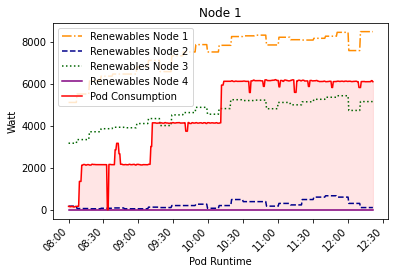

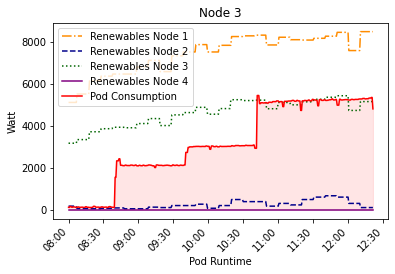

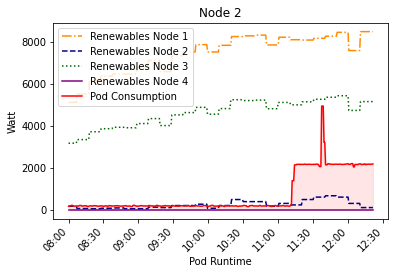

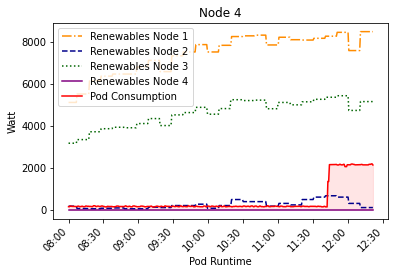

91.0200489321061


In [26]:
# 5.2.2

interval_simulator = 90
interval_monitor = 6
ts_resample = 600 / (interval_simulator / interval_monitor)

df = pd.read_csv('5.2.2a/monitor.log', delimiter = ";").fillna(0)

#print(df.head(30))

is_201 =  df['node']=='ip-172-20-45-201.ec2.internal'
is_41 = df['node']=='ip-172-20-49-41.ec2.internal'
is_134 = df['node']=='ip-172-20-58-134.ec2.internal'
is_178 = df['node']=='ip-172-20-61-178.ec2.internal'
print(df.head())


y1 = df[is_134].iloc[1: , :]['production'].values
y2 = df[is_178].iloc[1: , :]['production'].values
y3 = df[is_41].iloc[1: , :]['production'].values
y4 = df[is_201].iloc[1: , :]['production'].values

placed = df[is_134].iloc[1: , :]
placed = placed.reset_index(drop=True)


placed['ts_simulator'] = pd.to_datetime(placed['ts_simulator'], format="%Y-%m-%d %H:%M:%S")
placed['ts_resample'] = pd.to_datetime("2020-08-01 08:00:00", format="%Y-%m-%d %H:%M:%S") + np.arange(len(placed)) * pd.to_timedelta(ts_resample, unit='s')


x = placed['ts_resample'].values
con1 = placed['consumption'].values


fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

plt.plot(x, y1, color='darkorange', linestyle='-.', label="Renewables Node 1")
plt.plot(x, y2, color='darkblue', label="Renewables Node 2", linestyle='--')
plt.plot(x, y3, color='darkgreen', label="Renewables Node 3", linestyle=':')
plt.plot(x, y4, color='purple', label="Renewables Node 4")
plt.plot(x, con1, color='red', label="Pod Consumption")
plt.xlabel("Pod Runtime")
plt.ylabel("Watt")
plt.legend(loc='upper left')
plt.fill_between(x, 0, con1, color='red', alpha=.1)
plt.xticks(rotation=45)
plt.title("Node 1")
plt.show()

placed = df[is_41].iloc[1: , :]
placed = placed.reset_index(drop=True)
con3 = placed['consumption'].values

fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

plt.plot(x, y1, color='darkorange', linestyle='-.', label="Renewables Node 1")
plt.plot(x, y2, color='darkblue', label="Renewables Node 2", linestyle='--')
plt.plot(x, y3, color='darkgreen', label="Renewables Node 3", linestyle=':')
plt.plot(x, y4, color='purple', label="Renewables Node 4")
plt.plot(x, con3, color='red', label="Pod Consumption")
plt.xlabel("Pod Runtime")
plt.ylabel("Watt")
plt.legend(loc='upper left')
plt.fill_between(x, 0, con3, color='red', alpha=.1)
plt.xticks(rotation=45)
plt.title("Node 3")
plt.show()

placed = df[is_178].iloc[1: , :]
placed = placed.reset_index(drop=True)
con2 = placed['consumption'].values

fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

plt.plot(x, y1, color='darkorange', linestyle='-.', label="Renewables Node 1")
plt.plot(x, y2, color='darkblue', label="Renewables Node 2", linestyle='--')
plt.plot(x, y3, color='darkgreen', label="Renewables Node 3", linestyle=':')
plt.plot(x, y4, color='purple', label="Renewables Node 4")
plt.plot(x, con2, color='red', label="Pod Consumption")
plt.xlabel("Pod Runtime")
plt.ylabel("Watt")
plt.legend(loc='upper left')
plt.fill_between(x, 0, con2, color='red', alpha=.1)
plt.xticks(rotation=45)
plt.title("Node 2")
plt.show()


placed = df[is_201].iloc[1: , :]
placed = placed.reset_index(drop=True)
con4 = placed['consumption'].values

fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

plt.plot(x, y1, color='darkorange', linestyle='-.', label="Renewables Node 1")
plt.plot(x, y2, color='darkblue', label="Renewables Node 2", linestyle='--')
plt.plot(x, y3, color='darkgreen', label="Renewables Node 3", linestyle=':')
plt.plot(x, y4, color='purple', label="Renewables Node 4")
plt.plot(x, con4, color='red', label="Pod Consumption")
plt.xlabel("Pod Runtime")
plt.ylabel("Watt")
plt.legend(loc='upper left')
plt.fill_between(x, 0, con4, color='red', alpha=.1)
plt.xticks(rotation=45)
plt.title("Node 4")
plt.show()

# coverage metrics (can be universally applied to logs from all tests)
coverage_n1 = y1 / con1 *100
coverage_n2 = y2 / con2 *100
coverage_n3 = y3 / con3 *100
coverage_n4 = y4 / con4 *100

coverage_n1[coverage_n1 > 100] = 100 
coverage_n2[coverage_n2 > 100] = 100 
coverage_n3[coverage_n3 > 100] = 100
coverage_n4[coverage_n4 > 100] = 100

avg_n1 = np.mean(coverage_n1)
avg_n2 = np.mean(coverage_n2)
avg_n3 = np.mean(coverage_n3)
avg_n4 = np.mean(coverage_n4)

avgs = [avg_n1, avg_n2, avg_n3, avg_n4]

area1 = np.trapz(y=con1, x=placed.index.values)
area2 = np.trapz(y=con2, x=placed.index.values)
area3 = np.trapz(y=con3, x=placed.index.values)
area4 = np.trapz(y=con4, x=placed.index.values)

areas = [area1, area2, area3, area4]

weights = areas / sum(areas)

total_coverage = sum(avgs*weights)

print(total_coverage)


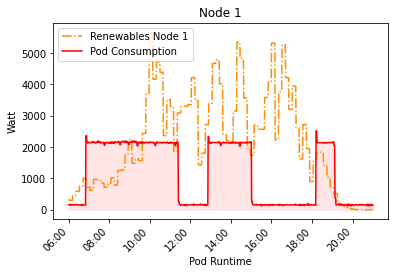

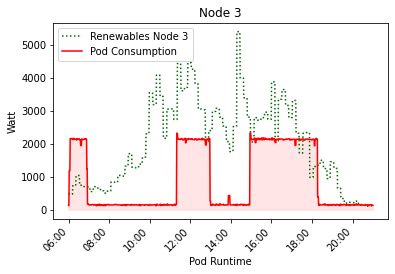

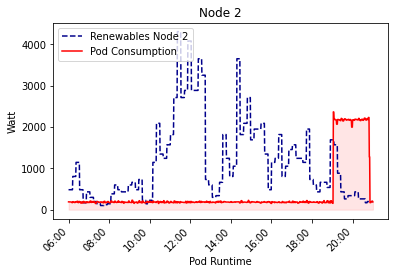

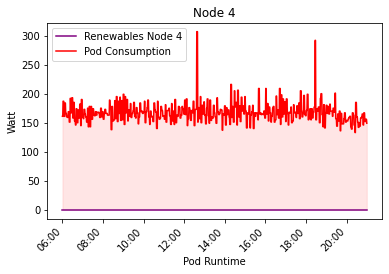

In [29]:
# 5.3
# d e s c h e d u l e r

interval_simulator = 60
interval_monitor = 5.8
ts_resample = 600 / (interval_simulator / interval_monitor)

df = pd.read_csv('5.3.1/monitor.log', delimiter = ";").fillna(0)

is_201 =  df['node']=='ip-172-20-45-201.ec2.internal'
is_41 = df['node']=='ip-172-20-49-41.ec2.internal'
is_134 = df['node']=='ip-172-20-58-134.ec2.internal'
is_178 = df['node']=='ip-172-20-61-178.ec2.internal'


y1 = df[is_134].iloc[1: , :]['production'].values
y2 = df[is_178].iloc[1: , :]['production'].values
y3 = df[is_41].iloc[1: , :]['production'].values
y4 = df[is_201].iloc[1: , :]['production'].values

placed = df[is_134].iloc[1: , :]
placed = placed.reset_index(drop=True)

# align timestamps according to simulation / nodemonitor interval
placed['ts_simulator'] = pd.to_datetime(placed['ts_simulator'], format="%Y-%m-%d %H:%M:%S")
placed['ts_resample'] = pd.to_datetime("2020-09-22 06:00:00", format="%Y-%m-%d %H:%M:%S") + np.arange(len(placed)) * pd.to_timedelta(ts_resample, unit='s')


x = placed['ts_resample'].values
con = placed['consumption'].values

coverage_n1 = y1 / con *100
coverage_n2 = y2 / con *100
coverage_n3 = y3 / con *100
coverage_n4 = y4 / con *100

coverage_n1[coverage_n1 > 100] = 100 
coverage_n2[coverage_n2 > 100] = 100 
coverage_n3[coverage_n3 > 100] = 100
coverage_n4[coverage_n4 > 100] = 100    


fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

plt.plot(x, y1, color='darkorange', linestyle='-.', label="Renewables Node 1")
plt.plot(x, con, color='red', label="Pod Consumption")
plt.xlabel("Pod Runtime")
plt.ylabel("Watt")
plt.legend(loc='upper left')
plt.fill_between(x, 0, con, color='red', alpha=.1)
plt.xticks(rotation=45)
plt.title("Node 1")
plt.show()

placed = df[is_41].iloc[1: , :]
placed = placed.reset_index(drop=True)
con = placed['consumption'].values

fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

plt.plot(x, y3, color='darkgreen', label="Renewables Node 3", linestyle=':')
plt.plot(x, con, color='red', label="Pod Consumption")
plt.xlabel("Pod Runtime")
plt.ylabel("Watt")
plt.legend(loc='upper left')
plt.fill_between(x, 0, con, color='red', alpha=.1)
plt.xticks(rotation=45)
plt.title("Node 3")
plt.show()

placed = df[is_178].iloc[1: , :]
placed = placed.reset_index(drop=True)
con = placed['consumption'].values

fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

plt.plot(x, y2, color='darkblue', label="Renewables Node 2", linestyle='--')
plt.plot(x, con, color='red', label="Pod Consumption")
plt.xlabel("Pod Runtime")
plt.ylabel("Watt")
plt.legend(loc='upper left')
plt.fill_between(x, 0, con, color='red', alpha=.1)
plt.xticks(rotation=45)
plt.title("Node 2")
plt.show()


placed = df[is_201].iloc[1: , :]
placed = placed.reset_index(drop=True)
con = placed['consumption'].values

fig, ax = plt.subplots()
myFmt = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()

plt.plot(x, y4, color='purple', label="Renewables Node 4")
plt.plot(x, con, color='red', label="Pod Consumption")
plt.xlabel("Pod Runtime")
plt.ylabel("Watt")
plt.legend(loc='upper left')
plt.fill_between(x, 0, con, color='red', alpha=.1)
plt.xticks(rotation=45)
plt.title("Node 4")
plt.show()
